Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.


Variable	          Description

Loan_ID	              Unique Loan ID

Gender	              Male/ Female

Married	Applicant      married (Y/N)

Dependents	           Number of dependents

Education	          Applicant Education (Graduate/ Under Graduate)

Self_Employed	     Self employed (Y/N)

ApplicantIncome	     Applicant income

CoapplicantIncome	 Coapplicant income

LoanAmount	         Loan amount in thousands

Loan_Amount_Term	 Term of loan in months

Credit_History	     credit history meets guidelines

Property_Area	     Urban/ Semi Urban/ Rural

Loan_Status	(Target) Loan approved (Y/N)

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [148]:
train_data=pd.read_csv('train_ctrUa4K.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [149]:
train_data.shape

(614, 13)

In [150]:
test_data=pd.read_csv('test_lAUu6dG.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [151]:
test_data.shape

(367, 12)

In [152]:
train_data1=train_data
test_data1=test_data

In [153]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [154]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [155]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [156]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [157]:
#checking for missing values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [158]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# EDA

In [159]:
#analysing target column
train_data['Loan_Status'].value_counts(normalize='True')

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

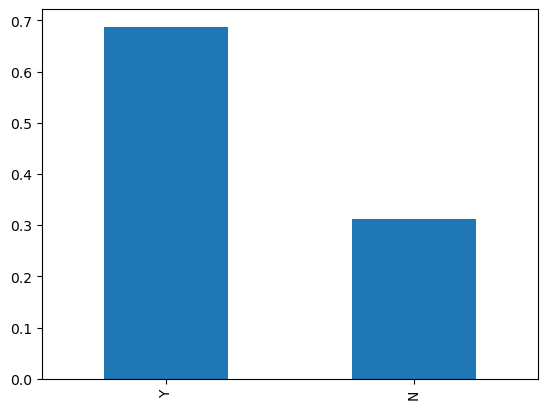

In [160]:
train_data['Loan_Status'].value_counts(normalize='True').plot(kind='bar')

In [161]:
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtype =='O']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [162]:
for column in categorical_features:
    no_of_unique = len(train_data[column].unique())
    print( column ,':' ,no_of_unique)   

Loan_ID : 614
Gender : 3
Married : 3
Dependents : 5
Education : 2
Self_Employed : 3
Property_Area : 3
Loan_Status : 2


In [163]:
cat=train_data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']]

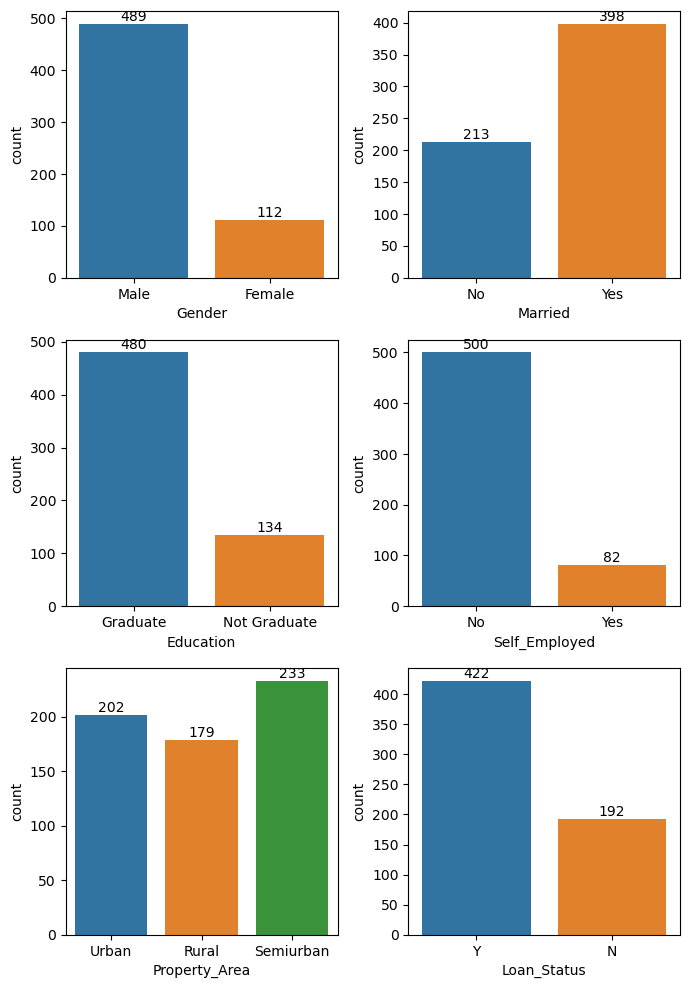

In [164]:
plt.figure(figsize=(7,10))
plotnumber =1
for column in cat:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        df=sns.countplot(cat[column])
        plt.xlabel(column,fontsize=10)
        for i in df.containers:
             df.bar_label(i)
    plotnumber+=1
        
plt.tight_layout()

In [165]:
neumeric_cols=train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

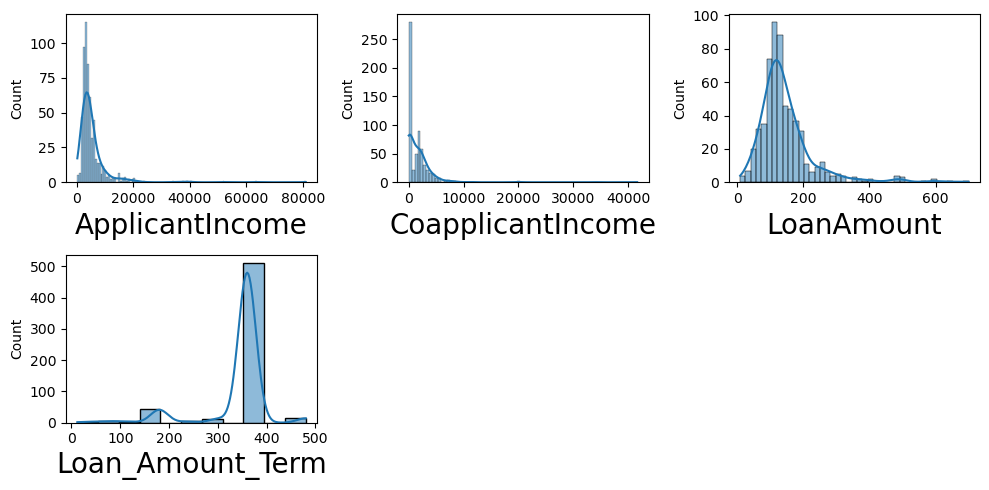

In [166]:
plt.figure(figsize=(10,5))
plotnumber =1
for column in neumeric_cols:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.histplot(neumeric_cols[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Preprocessing

# null value handling

In [167]:

train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])

train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])

train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])

train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

In [168]:
# filling null values by mean in each group

In [169]:
train_data.groupby(['Loan_Status'])['LoanAmount'].median()

Loan_Status
N    129.0
Y    126.0
Name: LoanAmount, dtype: float64

In [170]:
train_data['LoanAmount']=train_data.groupby('Loan_Status')['LoanAmount'].transform(lambda x : x.fillna(x.median()))
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())

train_data['Loan_Amount_Term']=train_data.groupby('Loan_Status')['Loan_Amount_Term'].transform(lambda x : x.fillna(x.median()))
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median())

train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])


In [171]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [172]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [173]:
train_data['Dependents']=train_data['Dependents'].replace('3+','3')
test_data['Dependents']=test_data['Dependents'].replace('3+','3')

In [174]:
train_data['Dependents']=train_data['Dependents'].astype(int)
test_data['Dependents']=test_data['Dependents'].astype(int)

In [175]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB


# Handling Outliers

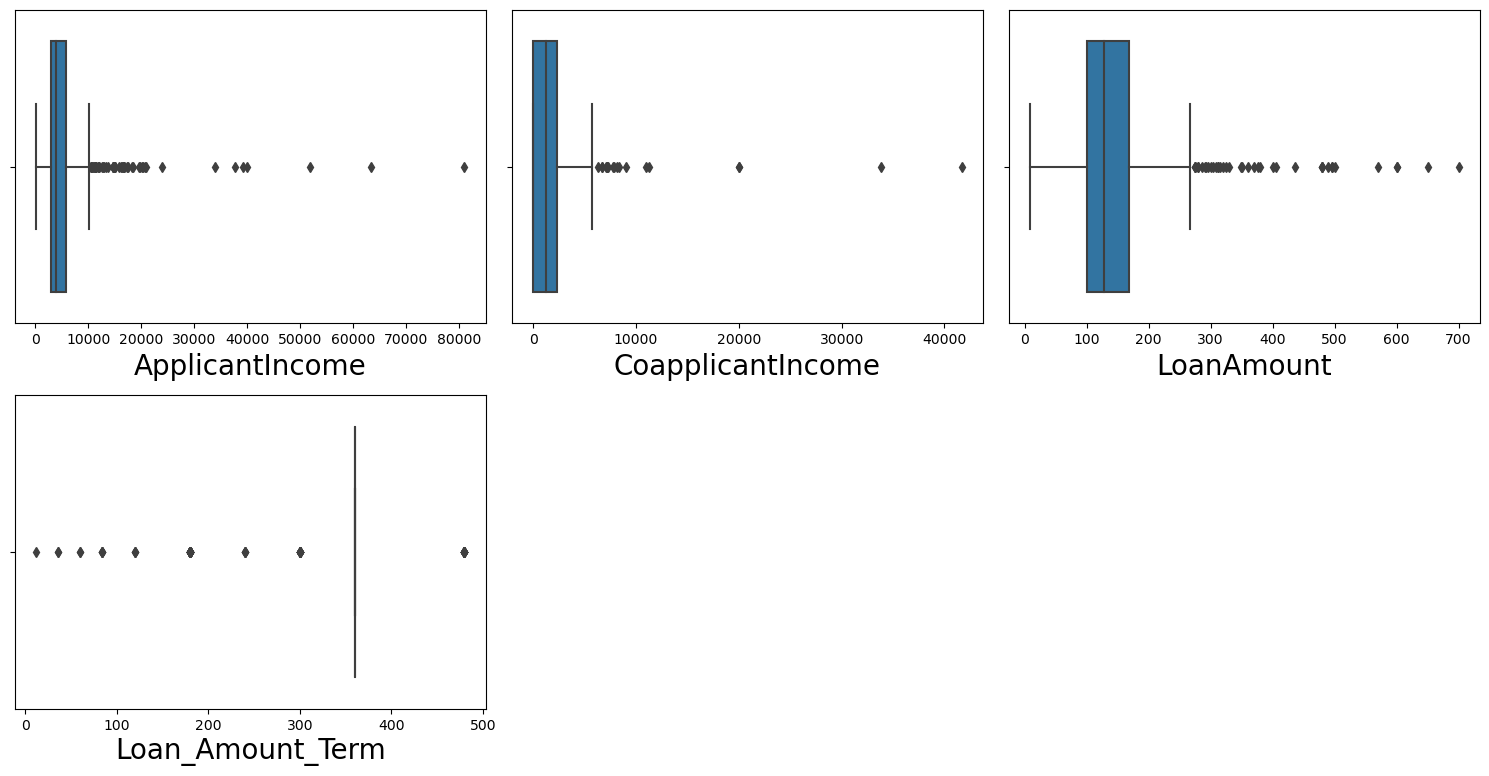

In [176]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in neumeric_cols:
    if plotnumber<=15:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(x=neumeric_cols[column],data=train_data)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

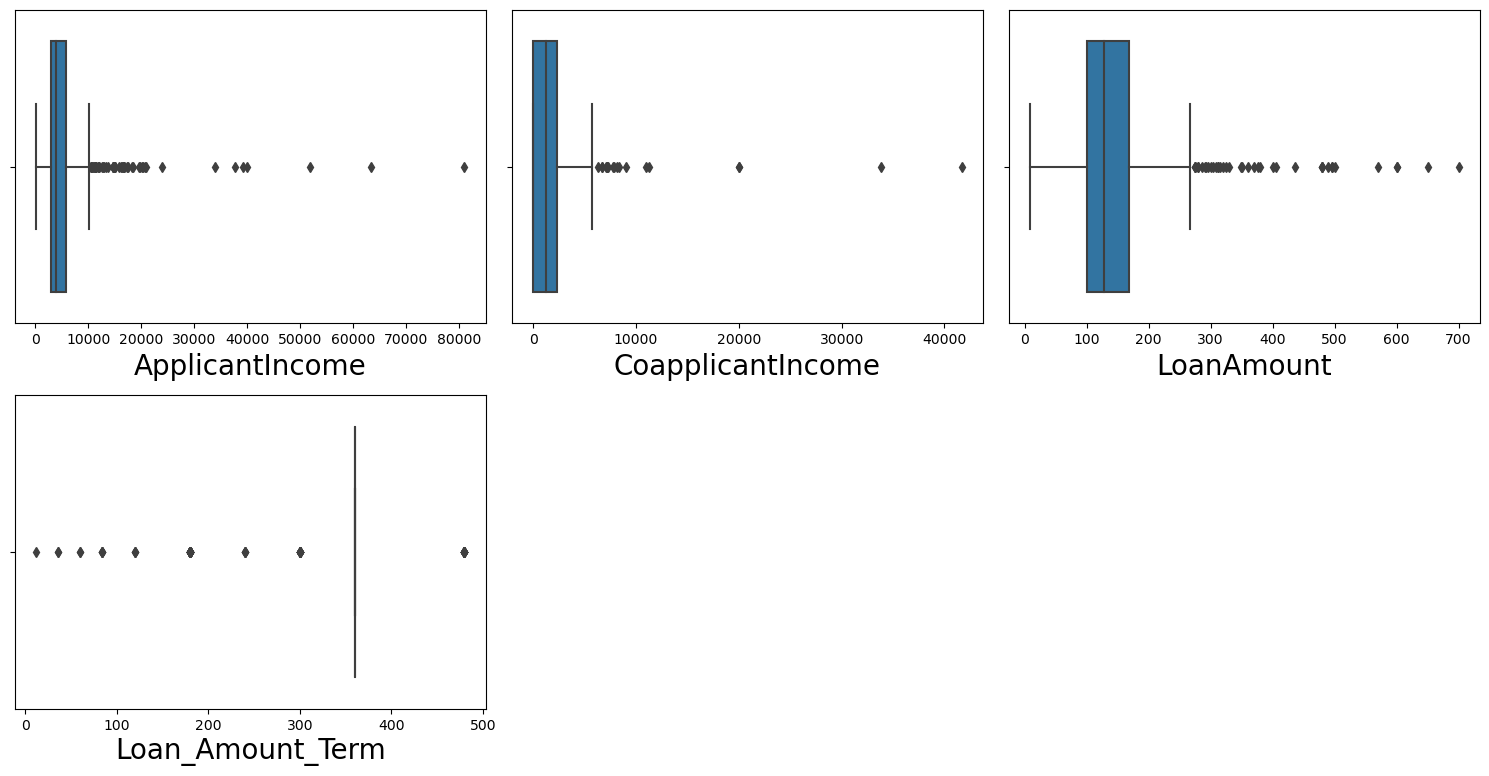

In [177]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in neumeric_cols:
    if plotnumber<=15:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(x=neumeric_cols[column],data=test_data)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [178]:
#finding outliers using IQR method

In [179]:
# Detecting and handling outliers in applicant income  
q1,q2,q3 = np.percentile(train_data['ApplicantIncome'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in train_data['ApplicantIncome']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 2877.5 3812.5 5795.0
IQR is : 2917.5
lower =  -1498.75
upper =  10171.25
50


In [180]:
# Detecting and handling outliers in applicant income  
q1,q2,q3 = np.percentile(test_data['ApplicantIncome'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in test_data['ApplicantIncome']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 2864.0 3786.0 5060.0
IQR is : 2196.0
lower =  -430.0
upper =  8354.0
32


In [181]:
# Detecting and handling outliers in coapplicant income  
q1,q2,q3 = np.percentile(train_data['CoapplicantIncome'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in train_data['CoapplicantIncome']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 0.0 1188.5 2297.25
IQR is : 2297.25
lower =  -3445.875
upper =  5743.125
18


In [182]:
# Detecting and handling outliers in coapplicant income  
q1,q2,q3 = np.percentile(test_data['CoapplicantIncome'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in test_data['CoapplicantIncome']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 0.0 1025.0 2430.5
IQR is : 2430.5
lower =  -3645.75
upper =  6076.25
8


In [183]:
# Detecting and handling outliers in LoanAmount 
q1,q2,q3 = np.percentile(train_data['LoanAmount'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in train_data['LoanAmount']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 100.25 128.0 164.75
IQR is : 64.5
lower =  3.5
upper =  261.5
41


In [184]:
# Detecting and handling outliers in LoanAmount 
q1,q2,q3 = np.percentile(test_data['LoanAmount'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in test_data['LoanAmount']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 101.0 125.0 157.5
IQR is : 56.5
lower =  16.25
upper =  242.25
18


In [185]:
# Detecting and handling outliers in coapplicant term  
q1,q2,q3 = np.percentile(train_data['Loan_Amount_Term'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in train_data['Loan_Amount_Term']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 360.0 360.0 360.0
IQR is : 0.0
lower =  360.0
upper =  360.0
88


In [186]:
# Detecting and handling outliers in coapplicant term  
q1,q2,q3 = np.percentile(test_data['Loan_Amount_Term'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in test_data['Loan_Amount_Term']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 360.0 360.0 360.0
IQR is : 0.0
lower =  360.0
upper =  360.0
50


In [187]:
# the details in these columns may be genuine

# Feature Engineering

In [188]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [189]:
train_data['total_income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
test_data['total_income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome']

In [190]:
train_data['total_income_by_loanAmt'] = train_data['total_income'] / train_data['LoanAmount']
train_data['ApplicantIncome_by_loanAmt'] = train_data['ApplicantIncome'] / train_data['LoanAmount']
train_data['Loan_Amount_Term_By_amt'] = train_data['LoanAmount'] / train_data['Loan_Amount_Term']

In [191]:
test_data['total_income_by_loanAmt'] = test_data['total_income'] / test_data['LoanAmount']
test_data['ApplicantIncome_by_loanAmt'] = test_data['ApplicantIncome'] / test_data['LoanAmount']
test_data['Loan_Amount_Term_By_amt'] = test_data['LoanAmount'] / test_data['Loan_Amount_Term']

In [192]:
train_data=train_data.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)
test_data=test_data.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)

In [193]:
train_data.head(4)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_by_loanAmt,ApplicantIncome_by_loanAmt,Loan_Amount_Term_By_amt
0,Male,No,0,Graduate,No,126.0,360.0,1.0,Urban,Y,5849.0,46.420635,46.420635,0.350000
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,47.585938,35.804688,0.355556
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,45.454545,45.454545,0.183333
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,41.175000,21.525000,0.333333


In [194]:
test_data.head(4)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,total_income_by_loanAmt,ApplicantIncome_by_loanAmt,Loan_Amount_Term_By_amt
0,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720,52.000000,52.000000,0.305556
1,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576,36.317460,24.412698,0.350000
2,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,6800,32.692308,24.038462,0.577778
3,Male,Yes,2,Graduate,No,100.0,360.0,1.0,Urban,4886,48.860000,23.400000,0.277778


<AxesSubplot:>

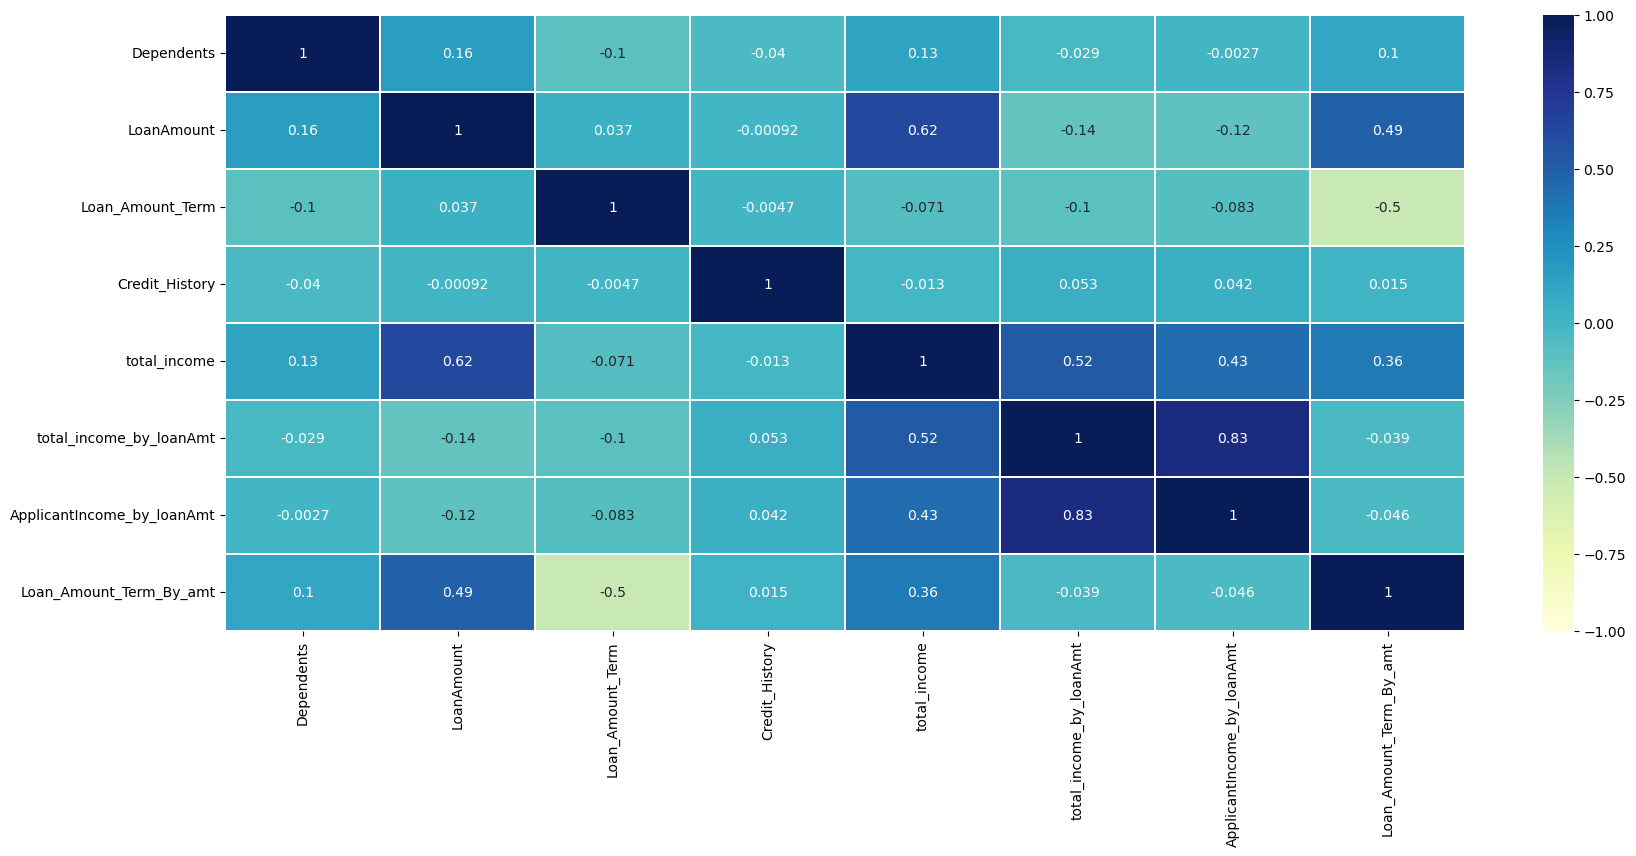

In [195]:
corrmatrix=train_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

# Encoding

In [196]:
train_data=pd.get_dummies(train_data,columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)
train_data.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,total_income,total_income_by_loanAmt,ApplicantIncome_by_loanAmt,Loan_Amount_Term_By_amt,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,126.0,360.0,1.0,5849.0,46.420635,46.420635,0.350000,1,0,0,0,0,1,1
1,1,128.0,360.0,1.0,6091.0,47.585938,35.804688,0.355556,1,1,0,0,0,0,0
2,0,66.0,360.0,1.0,3000.0,45.454545,45.454545,0.183333,1,1,0,1,0,1,1
3,0,120.0,360.0,1.0,4941.0,41.175000,21.525000,0.333333,1,1,1,0,0,1,1
4,0,141.0,360.0,1.0,6000.0,42.553191,42.553191,0.391667,1,0,0,0,0,1,1


In [197]:
test_data=pd.get_dummies(test_data,columns=['Gender','Married','Education','Self_Employed','Property_Area'],drop_first=True)
test_data.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,total_income,total_income_by_loanAmt,ApplicantIncome_by_loanAmt,Loan_Amount_Term_By_amt,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,110.0,360.0,1.0,5720,52.000000,52.000000,0.305556,1,1,0,0,0,1
1,1,126.0,360.0,1.0,4576,36.317460,24.412698,0.350000,1,1,0,0,0,1
2,2,208.0,360.0,1.0,6800,32.692308,24.038462,0.577778,1,1,0,0,0,1
3,2,100.0,360.0,1.0,4886,48.860000,23.400000,0.277778,1,1,0,0,0,1
4,0,78.0,360.0,1.0,3276,42.000000,42.000000,0.216667,1,0,1,0,0,1


In [198]:
#splitting data into dependent and independent columns
x=train_data.drop('Loan_Status_Y',axis=1)
y=train_data['Loan_Status_Y']

# Scaling

In [199]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dependents                  614 non-null    int32  
 1   LoanAmount                  614 non-null    float64
 2   Loan_Amount_Term            614 non-null    float64
 3   Credit_History              614 non-null    float64
 4   total_income                614 non-null    float64
 5   total_income_by_loanAmt     614 non-null    float64
 6   ApplicantIncome_by_loanAmt  614 non-null    float64
 7   Loan_Amount_Term_By_amt     614 non-null    float64
 8   Gender_Male                 614 non-null    uint8  
 9   Married_Yes                 614 non-null    uint8  
 10  Education_Not Graduate      614 non-null    uint8  
 11  Self_Employed_Yes           614 non-null    uint8  
 12  Property_Area_Semiurban     614 non-null    uint8  
 13  Property_Area_Urban         614 non

In [200]:
#standard scaling
from sklearn import preprocessing
standadisation=preprocessing.StandardScaler()
x=standadisation.fit_transform(x)
# Coverting to Dataframe
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-1.766593e-16,1.135086e-16,1.795524e-16,8.317632e-17,1.034279e-16,3.516912e-17,-1.537406e-16,-9.850065e-17,-6.364796e-17,2.064942e-16,1.121072e-17,-1.338054e-16,1.330821e-16,6.585395e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-7.378063e-01,-1.626959e+00,-5.132498e+00,-2.428760e+00,-8.650794e-01,-1.037912e+00,-1.117593e+00,-8.784203e-01,-2.117107e+00,-1.372089e+00,-5.283622e-01,-3.926007e-01,-7.820157e-01,-7.002080e-01
25%,-7.378063e-01,-5.412052e-01,2.732313e-01,4.117327e-01,-4.429764e-01,-4.187370e-01,-4.687354e-01,-3.617379e-01,4.723426e-01,-1.372089e+00,-5.283622e-01,-3.926007e-01,-7.820157e-01,-7.002080e-01
50%,-7.378063e-01,-2.110172e-01,2.732313e-01,4.117327e-01,-2.492027e-01,-2.588542e-01,-2.079479e-01,-2.203301e-01,4.723426e-01,7.288155e-01,-5.283622e-01,-3.926007e-01,-7.820157e-01,-7.002080e-01
75%,2.534696e-01,2.262588e-01,2.732313e-01,4.117327e-01,7.702060e-02,2.206042e-02,8.922199e-02,6.248560e-02,4.723426e-01,7.288155e-01,-5.283622e-01,-3.926007e-01,1.278747e+00,1.428147e+00
max,2.236021e+00,6.595020e+00,2.137276e+00,4.117327e-01,1.146299e+01,9.161050e+00,8.507455e+00,1.718371e+01,4.723426e-01,7.288155e-01,1.892641e+00,2.547117e+00,1.278747e+00,1.428147e+00


# Model selection

In [201]:
#splitting as training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0,test_size=0.33)

In [202]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

In [203]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          #'SVC':SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')

RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [204]:
# Evaluate the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [205]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred))
    model_test_f1_score.append(f1_score(y_test,y_pred))
    model_test_precision_score.append(precision_score(y_test,y_pred))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
    
confusion_matrix1={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  #'SVC':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6]}
confusion_matrix1

{'Random Forest': array([[ 27,  31],
        [  5, 140]], dtype=int64),
 'Logistic regression': array([[ 24,  34],
        [  3, 142]], dtype=int64),
 'KNN': array([[ 29,  29],
        [ 10, 135]], dtype=int64),
 'DecisionTree': array([[ 35,  23],
        [ 41, 104]], dtype=int64),
 'BernolliNB': array([[ 24,  34],
        [  2, 143]], dtype=int64),
 'GaussianNB': array([[ 27,  31],
        [  6, 139]], dtype=int64),
 'XGBClassifier': array([[ 31,  27],
        [ 22, 123]], dtype=int64)}

In [206]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.822660,0.886076,0.965517,0.818713
1,Logistic regression,0.817734,0.884735,0.979310,0.806818
2,KNN,0.807882,0.873786,0.931034,0.823171
3,DecisionTree,0.684729,0.764706,0.717241,0.818898
4,BernolliNB,0.822660,0.888199,0.986207,0.807910
5,GaussianNB,0.817734,0.882540,0.958621,0.817647
6,XGBClassifier,0.758621,0.833898,0.848276,0.820000


In [207]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'bootstrap': [True,False], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [208]:
rf = RandomForestClassifier(random_state = 1)
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [209]:
g_search.fit(x_train, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}


In [210]:
rf = RandomForestClassifier(n_estimators=10,max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [211]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred))
print('Precision Score is : ', precision_score(y_test,y_pred))
print('F1 score is : ', f1_score(y_test,y_pred))

Accuracy Score is :  0.812807881773399
Recall Score is :  0.9517241379310345
Precision Score is :  0.8165680473372781
F1 score is :  0.8789808917197452


In [212]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dependents                  367 non-null    int32  
 1   LoanAmount                  367 non-null    float64
 2   Loan_Amount_Term            367 non-null    float64
 3   Credit_History              367 non-null    float64
 4   total_income                367 non-null    int64  
 5   total_income_by_loanAmt     367 non-null    float64
 6   ApplicantIncome_by_loanAmt  367 non-null    float64
 7   Loan_Amount_Term_By_amt     367 non-null    float64
 8   Gender_Male                 367 non-null    uint8  
 9   Married_Yes                 367 non-null    uint8  
 10  Education_Not Graduate      367 non-null    uint8  
 11  Self_Employed_Yes           367 non-null    uint8  
 12  Property_Area_Semiurban     367 non-null    uint8  
 13  Property_Area_Urban         367 non

In [213]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dependents                  614 non-null    int32  
 1   LoanAmount                  614 non-null    float64
 2   Loan_Amount_Term            614 non-null    float64
 3   Credit_History              614 non-null    float64
 4   total_income                614 non-null    float64
 5   total_income_by_loanAmt     614 non-null    float64
 6   ApplicantIncome_by_loanAmt  614 non-null    float64
 7   Loan_Amount_Term_By_amt     614 non-null    float64
 8   Gender_Male                 614 non-null    uint8  
 9   Married_Yes                 614 non-null    uint8  
 10  Education_Not Graduate      614 non-null    uint8  
 11  Self_Employed_Yes           614 non-null    uint8  
 12  Property_Area_Semiurban     614 non-null    uint8  
 13  Property_Area_Urban         614 non

In [214]:
Y_pred=rf.predict(test_data)


In [215]:
result=pd.DataFrame({'Loan_ID':test_data1['Loan_ID'],'Loan_Status':Y_pred})
result.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [216]:
result=result.replace({'Loan_Status' : {0:'N',1:'Y'}})

In [217]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [218]:
result['Loan_Status'].value_counts()

N    213
Y    154
Name: Loan_Status, dtype: int64

In [219]:
result.to_csv('result.csv',index=False)